In [1]:
#import dependencies 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [9]:
#OPEN / READ CSV
charity_df = pd.read_csv("cleaned_data.csv")
charity_df.head()

,Unnamed: 0,Charity,ein,Mission,Cause,Category Name,Rating,State,Contributions
0,0,Mount Desert Island Biological Laboratory,10202467,The MDI Biological Laboratory is a rapidly gro...,"{'causeID': 35, 'causeName': 'Non-Medical Scie...",Research and Public Policy,92.61,ME,12924245.0
1,1,United Way of Eastern Maine,10211478,"Working with the communities we serve, the Uni...","{'causeID': 42, 'causeName': 'United Ways', 'c...",Community Development,81.84,ME,2438155.0
2,2,The Jackson Laboratory,10211513,"The Jackson Laboratory, founded in 1929, is an...","{'causeID': 14, 'causeName': 'Medical Research...",Health,93.16,ME,331241336.0
3,3,Maine Historical Society,10211530,"Founded in 1822, the Maine Historical Society ...","{'causeID': 6, 'causeName': 'Libraries, Histor...","Arts, Culture, Humanities",80.31,ME,2219692.0
4,4,Boys & Girls Clubs of Southern Maine,10211543,"For more than 100 years, Boys & Girls Clubs of...","{'causeID': 16, 'causeName': 'Youth Developmen...",Human Services,91.54,ME,3859985.0


In [27]:
#GATHER AVERAGE COUNTRIBUTIONS /  NUMBER OF CHARITIES PER STATE / AVG. RATING PER STATE
avg_cont = charity_df.groupby("State")["Contributions"].mean()
avg_charity_perState = charity_df.groupby("State")["Charity"].count()
avg_rating_perState = charity_df.groupby("State")["Rating"].mean()

#create dF for city name, avg fare, avg rides, #of drivers and city type
all_states = pd.DataFrame({"Average Contributions per State": avg_cont,
                          "Number of Charities per State": avg_charity_perState,
                          "Average Charity Rating per State": avg_rating_perState,
})

all_states.style.format({"Average Contributions per State":"${:,.0f}", "Average Charity Rating per State":"{:,.2f}%"})




,Average Contributions per State,Number of Charities per State,Average Charity Rating per State
State,,,
AK,"$4,731,354",17,81.59%
AL,"$10,795,822",66,84.17%
AR,"$9,821,407",34,82.23%
AZ,"$24,983,029",128,86.42%
CA,"$21,898,489",1025,86.83%
CO,"$15,032,724",257,86.82%
CT,"$36,856,156",130,87.06%
DC,"$34,982,122",477,85.91%
DE,"$7,913,956",24,86.58%


# Scatter Plot

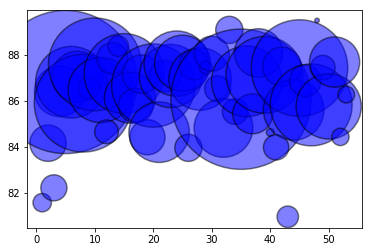

In [53]:
#PLOT GRAPHS
state = np.arange(1, 54, 1)    


plt.scatter(state, all_states["Average Charity Rating per State"], color='b',edgecolors="black", 
            s=all_states["Number of Charities per State"]*20, label ="States & Charities", alpha=0.5, linewidth=1.5)


# Pie Chart

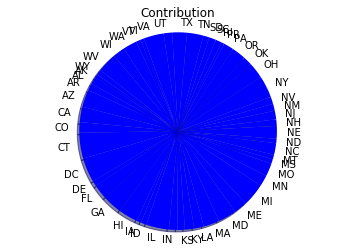

In [74]:
#Pie Chart

cont_pie= charity_df.groupby(["State"])["Contributions"].mean()

# Build Pie Chart
explode = np.arange(1, 54, 1)  

plt.pie(cont_pie, labels=cont_pie.index, colors='b', shadow=True, startangle= 145)
plt.title("Contribution")
plt.axis("equal")

# Save Figure
#plt.savefig("pie_chart.png")

# Show Figure
plt.show()